<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Pandas: Motivation
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 1: Topic 4</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

Pandas is a tabular data manipulation library.
- Intuitive: data columns and rows can be labeled. 
- Smart: interprets data types for you.
- Makes complex transformations over tabular data simple.




<div align = "center">
<img src="Images/pandas.png" width="500"/>
</div>

- In-built data cleaning and statistical functions over and within groups, etc.
- Some useful plotting tools.


In [1]:
# library imports
import numpy as np
import csv
import pandas as pd # importing pandas
import matplotlib.pyplot as plt # for the plotting

#### Loading the data through our csv Dict reader:

##### Downsides:

- Ugly: tabular form not apparent.
- What if we want to access statistics on the age of our athletes?
- More unwieldy when doing more complex things 
    


In [2]:
with open('Data/heart.csv') as f:
    heart_dict = csv.DictReader(f, delimiter=',')
    heart_dict_data = [entry for entry in heart_dict]
heart_dict_data[0:2]

[{'ï»¿age': '63',
  'sex': '1',
  'cp': '3',
  'trestbps': '145',
  'chol': '233',
  'fbs': '1',
  'restecg': '0',
  'thalach': '150',
  'exang': '0',
  'oldpeak': '2.3',
  'slope': '0',
  'ca': '0',
  'thal': '1',
  'target': '1'},
 {'ï»¿age': '37',
  'sex': '1',
  'cp': '2',
  'trestbps': '130',
  'chol': '250',
  'fbs': '0',
  'restecg': '1',
  'thalach': '187',
  'exang': '0',
  'oldpeak': '3.5',
  'slope': '0',
  'ca': '0',
  'thal': '2',
  'target': '1'}]

#### Loading the data directly into numpy array:

##### Downsides:
- Columns don't have labels. 
- Need to keep track by integer index.
- Tabular form but many complex data tasks tricky.

In [3]:
heart_numpy = np.genfromtxt(
'Data/heart.csv', delimiter = ",", 
skip_header = 1, dtype = 'float32')
heart_numpy

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]], dtype=float32)

In [4]:
# get data on cholesterol. integer_index = 4
cholesterol_lvl = heart_numpy[:, 4]
#print some of the list and get summary statistics
print("First ten cholesterol values: ")
print(cholesterol_lvl[0:10])
#print some of the list and get summary statistics
print("mean: " + str(cholesterol_lvl.mean()))
print("std: " + str(cholesterol_lvl.std(ddof=1)))

First ten cholesterol values: 
[233. 250. 204. 236. 354. 192. 294. 263. 199. 168.]
mean: 246.26402
std: 51.83075


Mean of cholesterol by sex for people above the age of 50?

While not impossible, this starts to get pretty annoying.



“Act without doing; work without effort. Think of the small as large and the few as many. Confront the difficult while it is still easy; accomplish the great task by a series of small acts." — Lao Tzu

"A small unecessary loop often finds a way of becoming the Gordian knot." — Your instructor

<figure align = "center">
<img src="Images/Gordian-Knot.jpg" width="400"/>
<figcaption align = "center">The Gordian knot.</figcaption>
</figure>


<div align = "center">
<img src="Images/fischetti_gordian.jpg" width="500"/>
<figcaption align = "center">Alexander the Great cutting the Gordian knot. Painting by Fedele Fischetti.</figcaption>
</div>

In [4]:
# loads in heart disease csv into an data structure called a pandas Dataframe
heart_df = pd.read_csv('Data/heart.csv')

#looking at this immediately:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
cols_to_keep = ['age', 'chol', 'thalach', 'sex']
result = heart_df.loc[heart_df['age'] > 50, cols_to_keep].groupby('sex').mean()
result = result[['chol', 'thalach']].rename(columns = {'chol': 'Mean Cholesterol', 'thalach': 'Mean of Max Achieved Heart Rate'}, 
                                   index = {0: 'Male', 1: 'Female'})

result



,Mean Cholesterol,Mean of Max Achieved Heart Rate
sex,,
Male,273.695652,147.043478
Female,242.496403,143.316547


I want to make a quick barplot of this with each average grouped by sex. Pandas makes this easy:

<AxesSubplot:xlabel='sex'>

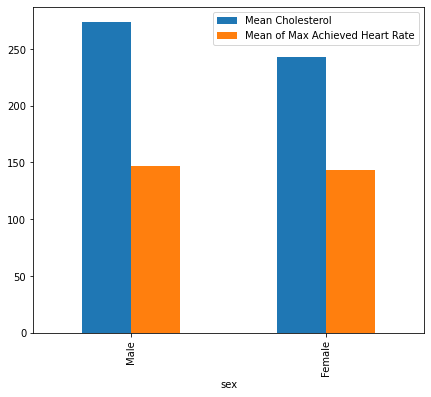

In [6]:
result.plot(kind = 'bar', figsize = (7,6))

#### Take-aways 

Pandas:

- Intuitive for tabular data
- Complex grouping operations and data manipulation with ease.
- Access to quick plotting functions.
- It's also fast (we'll get into this later).


So let's actually learn Pandas!
